# Wine Quality Project

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [282]:
df = pd.read_csv("F:\winequality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [283]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [284]:
df.shape

(1599, 12)

In [285]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


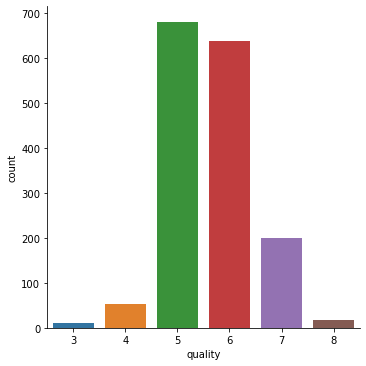

In [286]:
# number of values for each quality
sns.catplot(x='quality', data = df, kind = 'count')

# EDA :

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

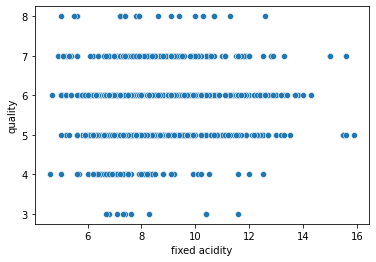

In [287]:
sns.scatterplot(data=df, x='fixed acidity', y='quality')

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

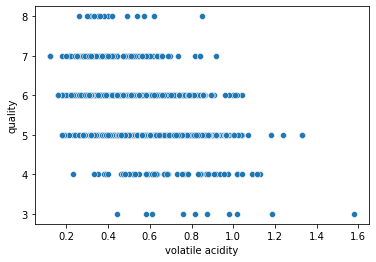

In [288]:
sns.scatterplot(data=df, x='volatile acidity', y='quality')

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

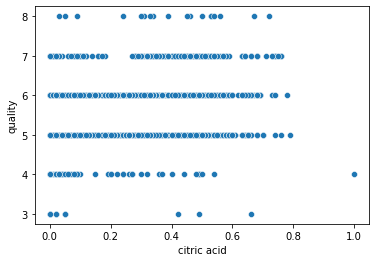

In [289]:
sns.scatterplot(data=df, x='citric acid', y='quality')

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

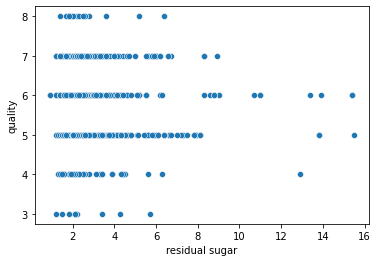

In [290]:
sns.scatterplot(data=df, x='residual sugar', y='quality')

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

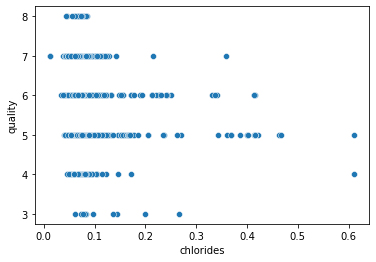

In [291]:
sns.scatterplot(data=df, x='chlorides', y='quality')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

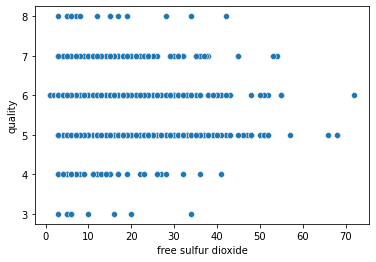

In [292]:
sns.scatterplot(data=df, x='free sulfur dioxide', y='quality')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

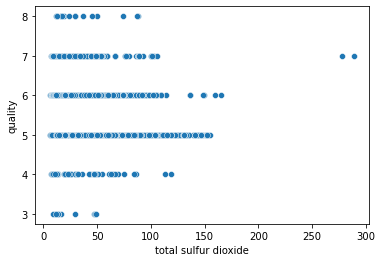

In [293]:
sns.scatterplot(data=df, x='total sulfur dioxide', y='quality')

<AxesSubplot:xlabel='pH', ylabel='quality'>

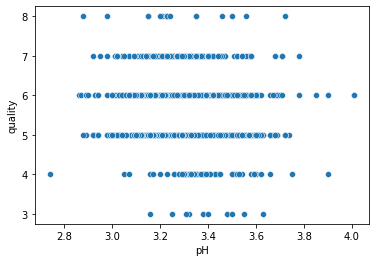

In [294]:
sns.scatterplot(data=df, x='pH', y='quality')

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

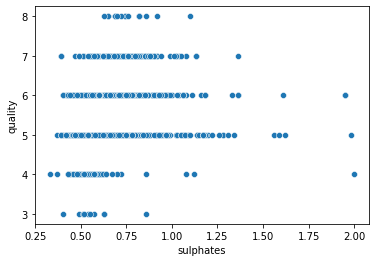

In [295]:
sns.scatterplot(data=df, x='sulphates', y='quality')

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

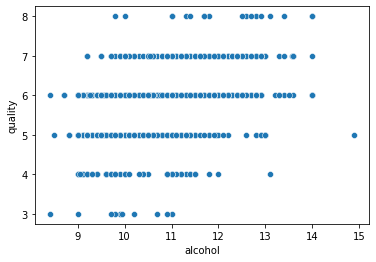

In [296]:
sns.scatterplot(data=df, x='alcohol', y='quality')

# Correlation :

In [297]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

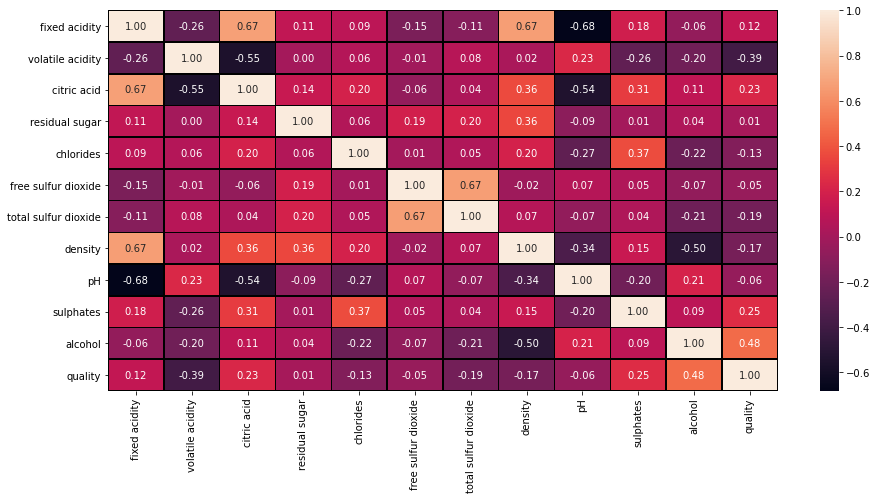

In [298]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black",fmt='.2f')

# Describing Dataset :

In [299]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


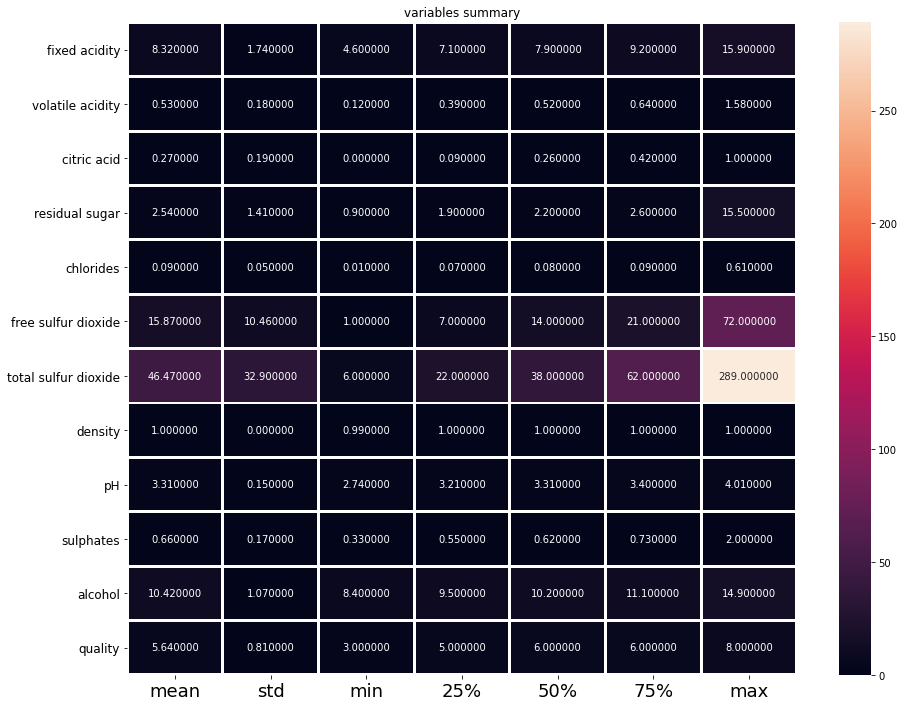

In [300]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variables summary')
plt.show()

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Outliers Checking

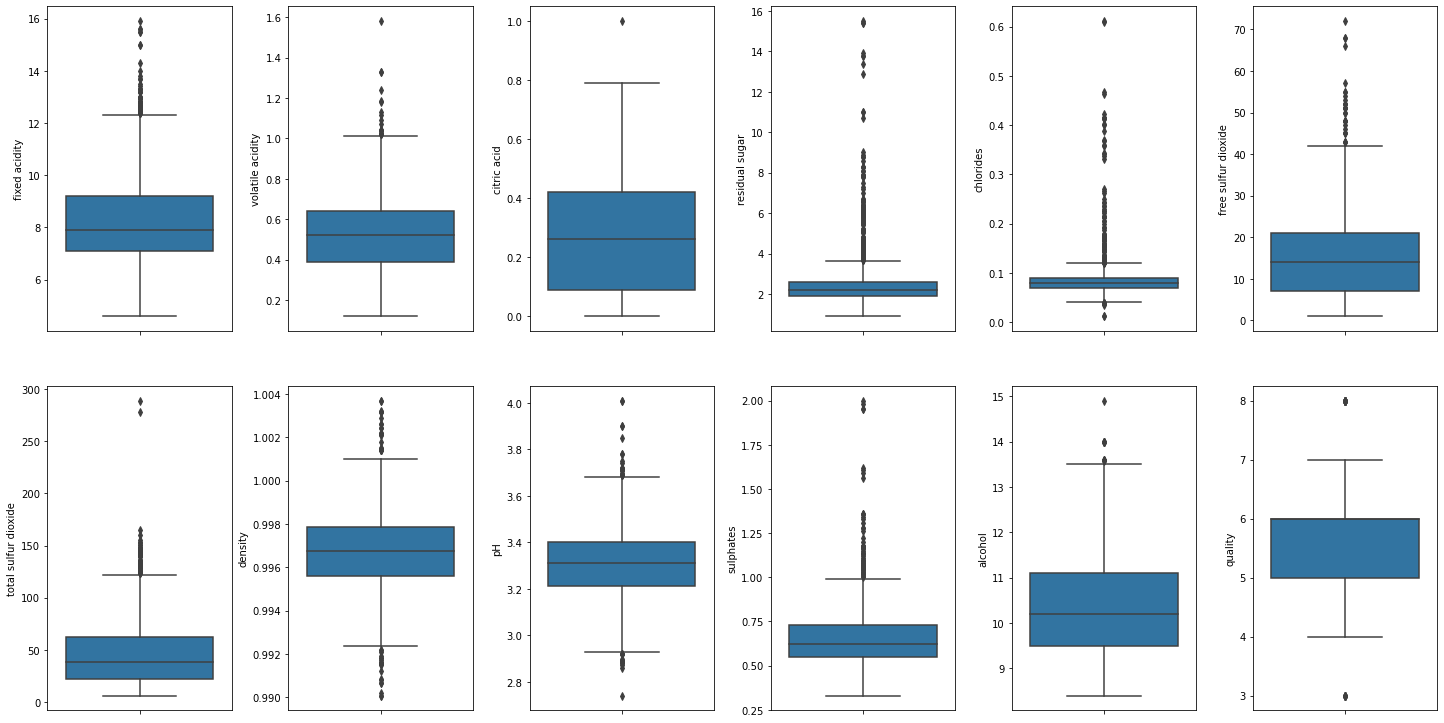

In [302]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Skewness :

In [303]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Normal Distribuiton Curve

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

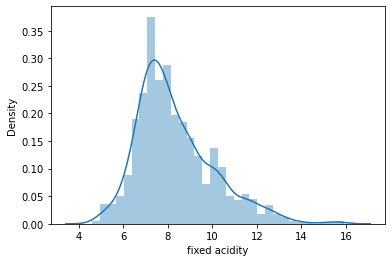

In [304]:
sns.distplot(df["fixed acidity"])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

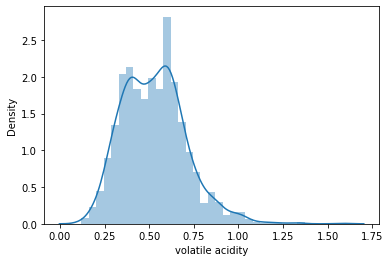

In [305]:
sns.distplot(df["volatile acidity"])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

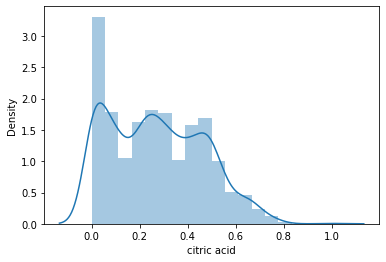

In [306]:
sns.distplot(df["citric acid"])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

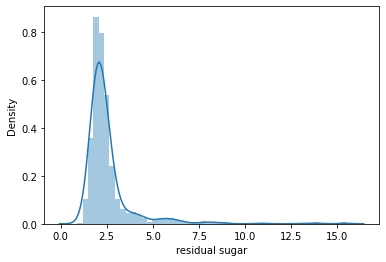

In [307]:
sns.distplot(df["residual sugar"])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

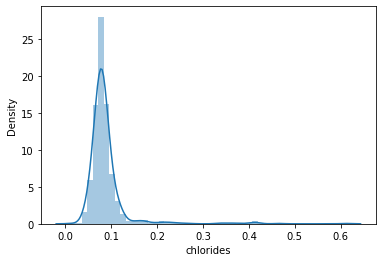

In [308]:
sns.distplot(df["chlorides"])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

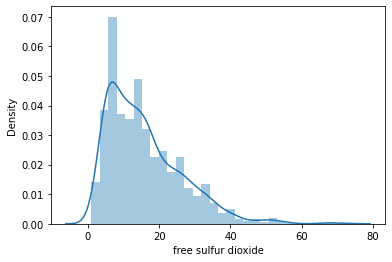

In [309]:
sns.distplot(df["free sulfur dioxide"])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

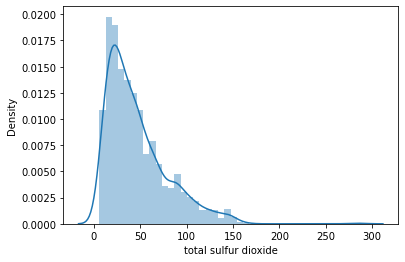

In [310]:
sns.distplot(df["total sulfur dioxide"])

<AxesSubplot:xlabel='density', ylabel='Density'>

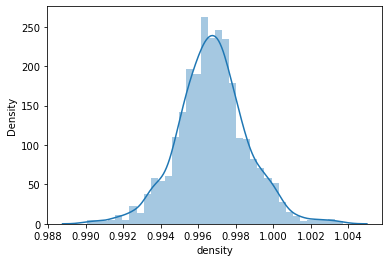

In [311]:
sns.distplot(df["density"])

<AxesSubplot:xlabel='pH', ylabel='Density'>

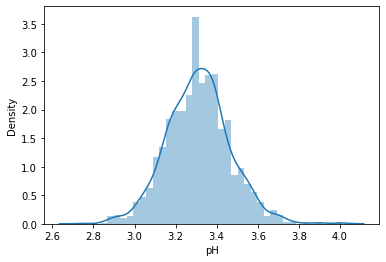

In [312]:
sns.distplot(df["pH"])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

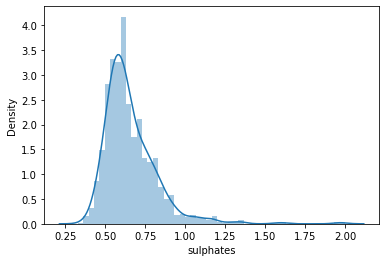

In [313]:
sns.distplot(df["sulphates"])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

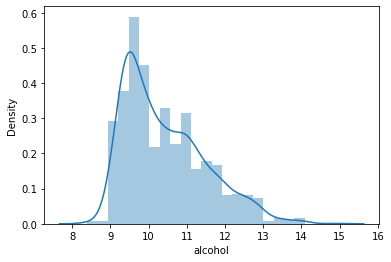

In [314]:
sns.distplot(df["alcohol"])

# The normal distritution shows, data is skewed.

# Data Cleaning :

In [315]:
!pip install pandas

In [316]:
delete=pd.DataFrame([["-0.057731", "residual sugar", "No", "Alot"],["-0.057731","free sulfur dioxide","No","Alot"],["-0.057731 ","pH","No","Alot"]],columns=["Correlation with Target", "Column Name", "Normalised", "Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,-0.057731,residual sugar,No,Alot
1,-0.057731,free sulfur dioxide,No,Alot
2,-0.057731,pH,No,Alot


In [317]:
df1=df.drop(['residual sugar','free sulfur dioxide','pH'],axis=1)
df1

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


# Removing Outliers :

In [318]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df1))
z.shape

(1599, 9)

In [319]:
threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 1598, 1598, 1598], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))


In [320]:
df_new=df1[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 12)
(1491, 9)


# Percentage of Data Loss :

In [321]:
loss_percent=(1599-1491)/1599*1491
print(loss_percent)

100.70544090056286


# Model without outliers is df and desired outliers is df_new

In [322]:
df1

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


In [323]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,:-1]

# Transforming data to remove skewness

In [324]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         5.64441955e-01, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
         3.69665306e-02,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
         1.42851242e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
        -5.27496656e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
        -6.72159727e-01,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
        -6.61431573e-01,  2.56369273e-01,  7.34557526e-01]])

In [325]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         5.64441955e-01, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
         3.69665304e-02,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
         1.42851242e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
        -5.27496656e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
        -6.72159727e-01,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
        -6.61431573e-01,  2.56369273e-01,  7.34557526e-01]])

# Splitting the dataframe :


In [326]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [327]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [328]:
y_pred=ln.predict(x_test)
print(y_pred)

[[ 1.05610988e+01  4.86285045e-01  4.42823186e-01 ...  9.98208797e-01
   8.16782913e-01  1.09690184e+01]
 [ 8.31352623e+00  8.00549980e-01 -1.73769144e-02 ...  9.98530889e-01
   4.98855717e-01  9.48098770e+00]
 [ 9.39942183e+00  2.71685327e-01  3.47444921e-01 ...  9.95170882e-01
   8.51262152e-01  1.17172313e+01]
 ...
 [ 7.99170375e+00  5.66550266e-01  3.58750852e-01 ...  9.97410849e-01
   5.86505201e-01  9.03931009e+00]
 [ 6.69411848e+00  6.65234456e-01  5.85171243e-03 ...  9.94970452e-01
   6.52209890e-01  1.06096335e+01]
 [ 8.25141635e+00  4.39182221e-01  3.68518690e-01 ...  9.97613822e-01
   3.75214794e-01  9.33037729e+00]]


In [329]:
#Evaluating the model 
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9149041293689579

In [330]:
# separate the data and Label
X = df1.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2


In [331]:
#label binarization :
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [332]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Class Imbalancement :

In [333]:
y = df['quality']
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Model Training:

In [334]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [335]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 55.25
CV Score: 55.41124608150471


In [336]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 56.00000000000001
CV Score: 47.21238244514107


In [337]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 65.0
CV Score: 57.41163793103448


In [338]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 66.75
CV Score: 57.47511755485893


In [339]:
#Random Forest Classifier

In [340]:
model = RandomForestClassifier()

In [341]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [342]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier()

# Model Evaluation 

In [343]:
#Accuracy Score -

In [344]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [345]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X, y, cv=5)
print("CV Score:", np.mean(score)*100)

CV Score: 57.16026645768025


In [346]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.921875


# Building a Predictive System :

In [353]:
input_data = (7.0,0.5,0.36,6.1,0.071,17.0,102.0,0.9978)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


# Model Saving :

In [354]:
import pickle
filename = 'World Happiness Score.pkl'
pickle.dump(ln, open(filename, 'wb'))